In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [5]:
df = pd.read_csv('Traffic_Crashes_-_Vision_Zero_Chicago_Traffic_Fatalities.csv')  # Replace with your actual file path


In [6]:
print(df.head())

  Person_ID              Crash_Date          Crash_Location      Victim  \
0  O1538374  03/19/2023 11:30:00 AM    2400 S WENTWORTH AVE  PEDESTRIAN   
1   O699223  07/28/2019 02:13:00 AM       3529 N HALSTED ST      DRIVER   
2  O1867282  07/20/2024 04:00:00 AM          4000 W 26TH ST      DRIVER   
3  O1506700  01/27/2023 05:46:00 PM  5049 W WASHINGTON BLVD  PEDESTRIAN   
4  O1149843  07/28/2021 07:14:00 PM     7899 S STONY ISLAND      DRIVER   

                                 Crash_Circumstances  Longitude   Latitude  \
0                                                NaN -87.632078  41.849115   
1                                                NaN -87.649308  41.946327   
2  UNIT 1 DISREGARDED TRAFFIC SIGNAL AND STRUCK U... -87.724614  41.844365   
3                                                NaN -87.752164  41.881618   
4                                                NaN -87.585465  41.751518   

                           Location  
0  POINT (-87.63207812 41.84911545)  
1  P

In [18]:
# Normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')
print("Cleaned columns:", df.columns.tolist())


Cleaned columns: ['person_id', 'crash_date', 'crash_location', 'victim', 'crash_circumstances', 'longitude', 'latitude', 'location', 'date', 'hour', 'dayofweek']


C:\Users\riza khan\AppData\Local\Temp\ipykernel_2864\847546411.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df, palette='coolwarm')


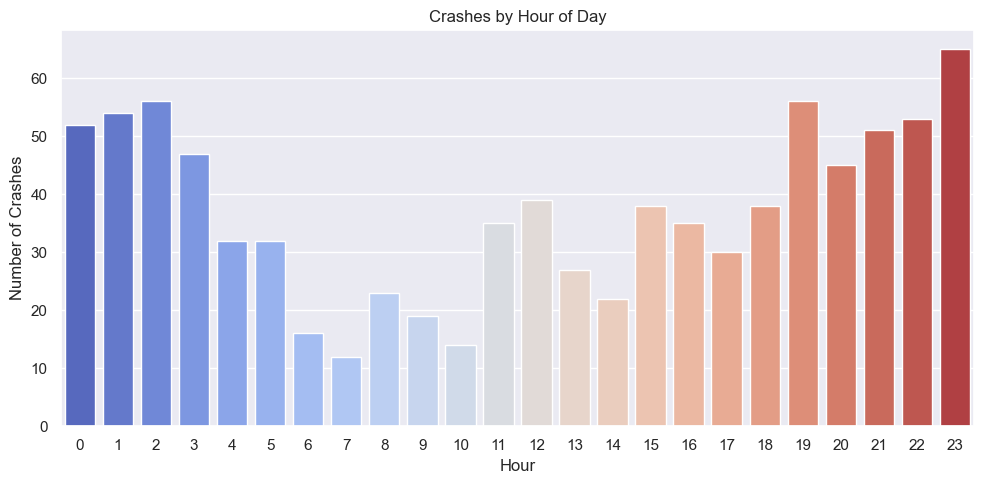

C:\Users\riza khan\AppData\Local\Temp\ipykernel_2864\847546411.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dayofweek', data=df, order=order, palette='viridis')


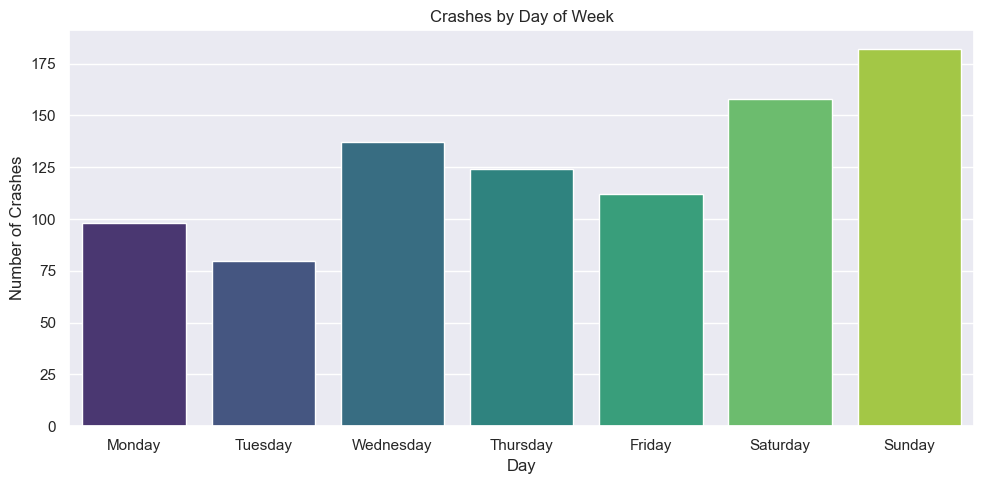

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# 🕒 Accidents by Hour
plt.figure(figsize=(10, 5))
sns.countplot(x='hour', data=df, palette='coolwarm')
plt.title('Crashes by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Crashes')
plt.tight_layout()
plt.show()

# 📅 Accidents by Day of Week
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(10, 5))
sns.countplot(x='dayofweek', data=df, order=order, palette='viridis')
plt.title('Crashes by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Crashes')
plt.tight_layout()
plt.show()


In [21]:
for col in ['weather_conditions', 'road_surface_conditions', 'light_conditions']:
    if col in df.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index)
        plt.title(f'Crashes by {col.replace("_", " ").title()}')
        plt.xlabel('Number of Crashes')
        plt.ylabel(col.replace('_', ' ').title())
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{col}' not found; skipping.")



Column 'weather_conditions' not found; skipping.
Column 'road_surface_conditions' not found; skipping.
Column 'light_conditions' not found; skipping.


In [22]:
import folium
from folium.plugins import HeatMap

if 'latitude' in df.columns and 'longitude' in df.columns:
    df_map = df.dropna(subset=['latitude', 'longitude'])
    m = folium.Map(location=[df_map['latitude'].mean(), df_map['longitude'].mean()], zoom_start=11)
    heat_data = df_map[['latitude', 'longitude']].values.tolist()
    HeatMap(heat_data, radius=8).add_to(m)
    m.save('chicago_crash_hotspots.html')
    print("Saved map to chicago_crash_hotspots.html")
else:
    print("Coordinates not found; heatmap skipped.")


Saved map to chicago_crash_hotspots.html


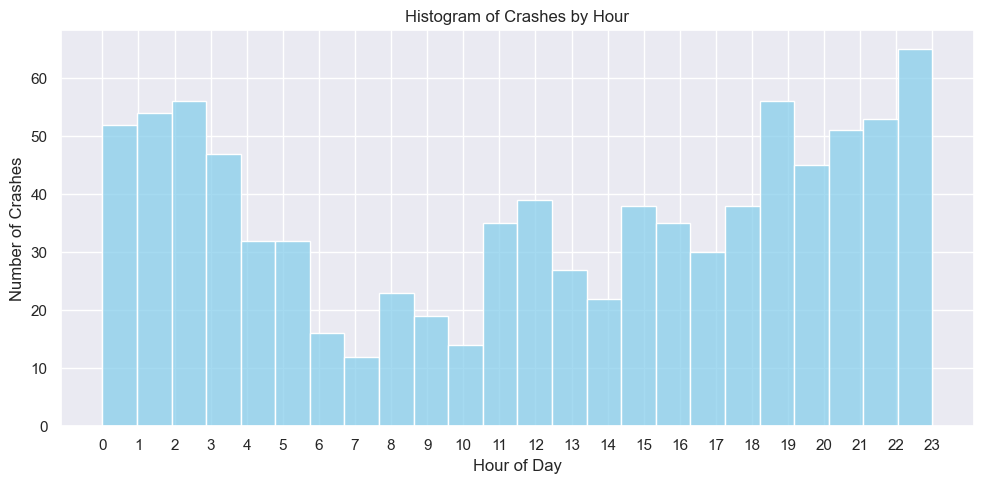

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of crashes by hour
plt.figure(figsize=(10, 5))
sns.histplot(df['hour'], bins=24, kde=False, color='skyblue')
plt.title('Histogram of Crashes by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
import folium
from folium.plugins import HeatMap

# Drop rows with missing coordinates
df_map = df.dropna(subset=['latitude', 'longitude'])

# Create base map centered around Chicago
map_center = [df_map['latitude'].mean(), df_map['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=11)

# Prepare heatmap data
heat_data = df_map[['latitude', 'longitude']].values.tolist()

# Add heatmap layer
HeatMap(heat_data, radius=8).add_to(m)

# Save map to HTML file
m.save('chicago_crash_heatmap.html')
print("✅ Heatmap saved as 'chicago_crash_heatmap.html'")


✅ Heatmap saved as 'chicago_crash_heatmap.html'
